In [13]:
import random
import numpy as np
import pandas as pd
random.seed(42)
np.random.seed(42)

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

/Users/zhangyuchen/miniforge3/envs/yuki/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#https://www.embedded-robotics.com/sentiment-analysis-using-lstm/
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read original dataset
data_path = 'data/convincing_data.csv'
data = pd.read_csv(data_path)
data['body_cleaned'] = data['body_cleaned'].apply(lambda x: x.strip('[]').replace("'",'').split(', '))
data ['text'] = data['body_cleaned'].apply(lambda x: ' '.join(x))


'\n# read original dataset\ndata_path = \'data/convincing_data.csv\'\ndata = pd.read_csv(data_path)\ndata[\'body_cleaned\'] = data[\'body_cleaned\'].apply(lambda x: x.strip(\'[]\').replace("\'",\'\').split(\', \'))\ndata [\'text\'] = data[\'body_cleaned\'].apply(lambda x: \' \'.join(x))\n'

In [4]:
# save new dataset
data[['id','text','score','body_length','sentiment']].to_csv('text.csv')


"\n# save new dataset\ndata[['id','text','score','body_length','sentiment']].to_csv('text.csv')\n"

In [5]:
# OR directly read reprocessed dataset
data_path = '/content/drive/MyDrive/dataset/text.csv'
data = pd.read_csv(data_path)

In [6]:
# prob -> label
# 0:neg, 1:pos, 2:neu
def score_label(score):
    if score > 1/3: return 1
    elif score < -1/3: return 0
    else: return 2
data['sentiment'] = data['sentiment'].apply(lambda x: score_label(x))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.1, random_state=42)


In [11]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, split=' ')
tokenizer.fit_on_texts(X_train)
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)

Number of Documents:  638313
Number of Words:  10000


In [12]:
sequence_length = 1000

train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

# Modelling

In [13]:
# y -> one hot
from keras.utils import to_categorical
y_train = to_categorical(y_train)

In [14]:
# split train & validation
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
embedding_dim = 16
lstm_out = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))
model.add(Bidirectional(LSTM(lstm_out)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 16)          160000    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              148480    
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 309,251
Trainable params: 309,251
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.add(Embedding (vocab size, 128, input_length=max len))
model.add(SpatialDropout1D(0.25))model BORU.add(Bidirectional(GRU(64, dropout=0.3,return_ sequences = True, kernel regularizer=[2(0.005))))model BGRU.add(Bidirectional (GRU(32,dropout=0.2)))
model.add (Dense(3. activation=' softmax'))
model.compile(loss='categorical crossentropy'.optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X train, y_train, epochs=50, batch size=128, validation split=0.1, callbacks = required callbacks)

In [16]:
# Train model
batch_size = 128
epochs = 8
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/8
4489/4489 [==============================] - 533s 117ms/step - loss: 1.0321 - accuracy: 0.4202 - val_loss: 1.0291 - val_accuracy: 0.4184
Epoch 2/8
4489/4489 [==============================] - 472s 105ms/step - loss: 1.0306 - accuracy: 0.4248 - val_loss: 1.0278 - val_accuracy: 0.4261
Epoch 3/8
4489/4489 [==============================] - 471s 105ms/step - loss: 1.0107 - accuracy: 0.4450 - val_loss: 0.9832 - val_accuracy: 0.4630
Epoch 4/8
4489/4489 [==============================] - 473s 105ms/step - loss: 0.9846 - accuracy: 0.4632 - val_loss: 0.9802 - val_accuracy: 0.4663
Epoch 5/8
4489/4489 [==============================] - 469s 104ms/step - loss: 0.9816 - accuracy: 0.4699 - val_loss: 0.9750 - val_accuracy: 0.4770
Epoch 6/8
4489/4489 [==============================] - 468s 104ms/step - loss: 0.9744 - accuracy: 0.4917 - val_loss: 1.0203 - val_accuracy: 0.4350
Epoch 7/8
4489/4489 [==============================] - 476s 106ms/step - loss: 0.9378 - accuracy: 0.5508 - val_loss: 0

In [17]:
# get y_pred
# y_pred = model.predict_classes(X_test)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

2217/2217 [==============================] - 53s 23ms/step


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluation(y, y_pred):
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [19]:
print('Accuracy, Precision, Recall, F1:', evaluation(y_test, y_pred))

Accuracy, Precision, Recall, F1: (0.6796993965371384, 0.666886201785649, 0.6796993965371384, 0.6514779032458422)


In [20]:
pd.Series(y_test).to_csv('/content/drive/MyDrive/dataset/LSTM_true.csv', index=False, header=False)
pd.Series(y_pred).to_csv('/content/drive/MyDrive/dataset/LSTM_predict.csv', index=False, header=False)

## plot

In [21]:
metrics_df = pd.DataFrame(history.history)
train_loss = metrics_df.loss
val_loss = metrics_df.val_loss
train_acc = metrics_df.accuracy
val_acc = metrics_df.val_accuracy
epochs = metrics_df.index

method = 'LSTM method' #method name

train_loss = [1.0321,1.0306,1.0107,0.9846,0.9846,0.9816,0.9378,0.8468]

val_loss = [1.0291,1.0278,0.9832,0.9802,0.9750,1.0203,0.8771,0.7692]

train_acc = [0.4202,0.4248,0.4450,0.4632,0.4699,0.4917,0.5508,0.6288]

val_acc = [0.4184,0.4261,0.4630,0.4663,0.4770,0.4350,0.5995,0.6781]

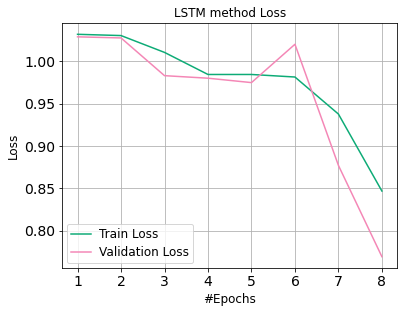

In [15]:
plt.figure(figsize=(6, 4.5))
plt.grid(linestyle="-")  
ax = plt.gca()
plt.plot(epochs, train_loss, color="#0DAB76", label="Train Loss", linewidth=1.5)
plt.plot(epochs, val_loss, color="#F487B6", label="Validation Loss", linewidth=1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Loss", fontsize=12)
plt.xlabel("#Epochs", fontsize=12)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12) 

plt.title(method + ' Loss')

plt.savefig('./' + method + '_loss.pdf', format='pdf')  # save as pdf, then screen capture
plt.show()

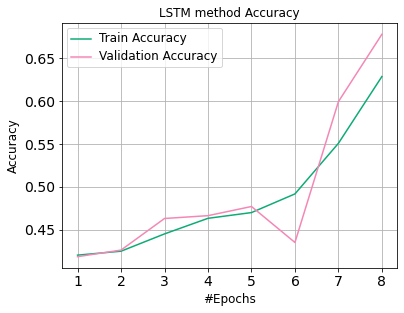

In [18]:
plt.figure(figsize=(6, 4.5))
plt.grid(linestyle="-")  
ax = plt.gca()
plt.plot(epochs, train_acc, color="#0DAB76", label="Train Accuracy", linewidth=1.5)
plt.plot(epochs, val_acc, color="#F487B6", label="Validation Accuracy", linewidth=1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("#Epochs", fontsize=12)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12) 

plt.title(method + ' Accuracy')

plt.savefig('./'+method+'_acc.pdf', format='pdf')  # save as pdf, then screen capture
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

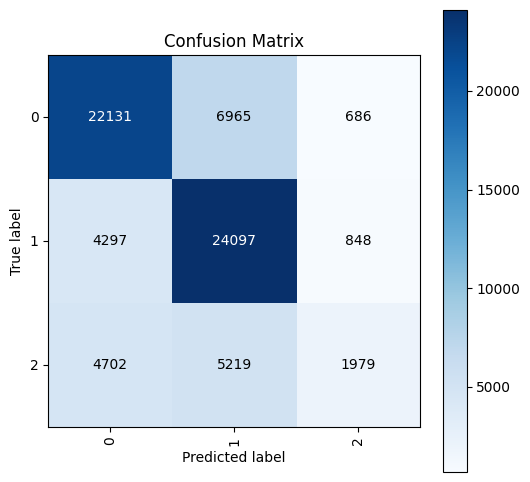

In [24]:
!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(6,6),x_tick_rotation=90)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73     29782
           1       0.66      0.82      0.74     29242
           2       0.56      0.17      0.26     11900

    accuracy                           0.68     70924
   macro avg       0.65      0.58      0.57     70924
weighted avg       0.67      0.68      0.65     70924

